In [1]:
from HARK.rewards import CRRAutility, CRRAutilityP
import matplotlib.pyplot as plt
import numpy as np

CRRAutilityP_hack = lambda c, gam: float('inf') if c == 0.0 else CRRAutilityP(c, gam)

In [2]:
from HARK.ConsumptionSaving.ConsIndShockModel import (
    IndShockConsumerType, init_lifecycle
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
import cons_stages

CRRA = cons_stages.CRRA
epsilon = cons_stages.epsilon

In [4]:
def display_stage(stage):
    print(f"x: {stage.inputs}, k: {stage.shocks}, a: {stage.actions}, y: {stage.outputs}")

In [5]:
## Doing this because of the CRRAutility warnings

import warnings
warnings.filterwarnings('ignore')

## Consumption with Independent Shocks

_Notebook by Sebastian Benthall_

In this notebook, we will use both HARK and BARK to build and solve a household consumption model with independent shocks, and compare the results.

### Simple Lifecycle Model

**TODO**: Develop a very simple (unrealistic) lifecycle with easy parameters that can be passed to HARK and BARK for comparison.

In [36]:
init_lifecycle

{'cycles': 1,
 'CRRA': 2.0,
 'Rfree': 1.03,
 'DiscFac': 0.96,
 'LivPrb': [0.998566,
  0.998583,
  0.998599,
  0.998609,
  0.998611,
  0.99861,
  0.998601,
  0.998569,
  0.998508,
  0.998419,
  0.998312,
  0.998192,
  0.998056,
  0.997906,
  0.99774,
  0.997556,
  0.997348,
  0.997115,
  0.996852,
  0.996562,
  0.996249,
  0.995916,
  0.995561,
  0.995186,
  0.99479,
  0.994349,
  0.993881,
  0.993428,
  0.993005,
  0.992583,
  0.992124,
  0.991583,
  0.990942,
  0.990175,
  0.98929,
  0.988296,
  0.987216,
  0.986059,
  0.984831,
  0.983509,
  0.982022,
  0.980368,
  0.978602,
  0.976732,
  0.974708,
  0.97243,
  0.969863,
  0.967036,
  0.963933,
  0.960506,
  0.956589,
  0.952211,
  0.947534,
  0.942585,
  0.937209,
  0.931163,
  0.924276,
  0.916534,
  0.907855,
  0.898197,
  0.887532,
  0.8758360000000001,
  0.863084,
  0.849246,
  0.834296],
 'PermGroFac': [1.0419577244168425,
  1.042054094671763,
  1.0419741368106594,
  1.0417252594892363,
  1.0413149489133513,
  1.040750757064985

In [35]:
init_simple_lifecycle = {}

### With HARK

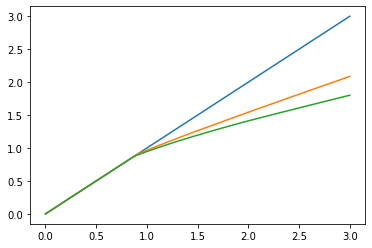

In [17]:
agent = IndShockConsumerType(**init_simple_lifecycle)
agent.solve()

fig = plt.figure()

x = np.linspace(0,3, 100)
N = 3

for t in range(agent.T_age, agent.T_age - N, -1):
    plt.plot(x, agent.solution[t].cFunc(x))
    
plt.show()

In [30]:
agent 

<HARK.ConsumptionSaving.ConsIndShockModel.IndShockConsumerType object at 0x7ff92118b5b0.
Parameters:
cycles: 1
CRRA: 2.0
Rfree: 1.03
DiscFac: 0.96
LivPrb: [0.998566, 0.998583, 0.998599, 0.998609, 0.998611, 0.99861, 0.998601, 0.998569, 0.998508, 0.998419, 0.998312, 0.998192, 0.998056, 0.997906, 0.99774, 0.997556, 0.997348, 0.997115, 0.996852, 0.996562, 0.996249, 0.995916, 0.995561, 0.995186, 0.99479, 0.994349, 0.993881, 0.993428, 0.993005, 0.992583, 0.992124, 0.991583, 0.990942, 0.990175, 0.98929, 0.988296, 0.987216, 0.986059, 0.984831, 0.983509, 0.982022, 0.980368, 0.978602, 0.976732, 0.974708, 0.97243, 0.969863, 0.967036, 0.963933, 0.960506, 0.956589, 0.952211, 0.947534, 0.942585, 0.937209, 0.931163, 0.924276, 0.916534, 0.907855, 0.898197, 0.887532, 0.8758360000000001, 0.863084, 0.849246, 0.834296]
PermGroFac: [1.0419577244168425, 1.042054094671763, 1.0419741368106594, 1.0417252594892363, 1.0413149489133513, 1.0407507570649859, 1.0400402904123676, 1.0391911991207914, 1.038211166778342

### With BARK

We have predefined some stage definitions in this module:

The labor stage has no actions. In this stage, the agent experiences exogenous shocks and grows their resources.

In [10]:
c_stage = cons_stages.consumption_stage
l_stage = cons_stages.labor_stage

display_stage(l_stage)

x: ['b'], k: {'theta': <HARK.distribution.Lognormal object at 0x7ff922151d20>, 'psi': <HARK.distribution.Lognormal object at 0x7ff922151ab0>}, a: [], y: ['m']


#### Consumption stage

In [12]:
display_stage(c_stage)

x: ['m'], k: {}, a: ['c'], y: ['a']


The consumption stage models the transition $a = m - c$ where $c$ is the choice of consumption. It has no shocks.

We will straightforwardly solve the consumption stage/block using EGM.

#### Labor stage

In [14]:
display_stage(l_stage)

x: ['b'], k: {'theta': <HARK.distribution.Lognormal object at 0x7ff922151d20>, 'psi': <HARK.distribution.Lognormal object at 0x7ff922151ab0>}, a: [], y: ['m']


The general form of the marginal value update for a b-block is:

$$v'_x(x) = \mathbb{E}_k\left[\frac{\partial q}{\partial x}(x, k, \pi^*(x, k)) \right] = \mathbb{E}_k\left[\beta v'_y(T(x, k, \pi^*(x, k)))\frac{\partial T}{\partial x} (x, k, \pi^*(x, k) \right]$$

In the case of the labor stage:

- $g(b, \theta, \psi) = \frac{b + \theta}{G \psi}$
  - $\frac{\partial g}{\partial b} = \frac{1}{G \psi}$
- $\beta(\theta, \psi) = (G \psi) ^ {\rho -1}$ -- disputed

Therefore:

$$v'_x(b) = \mathbb{E}_{\psi, \theta} \left[(G\psi)^{\rho - 1} v'_y \left( \frac{b + \theta}{G \psi} \right) \frac{1}{G\psi} \right]$$

We can repeat these stages again and again to simulate the household earning and consuming over time.

But there's one small problem: the output of the consumption stage is $m$ while the input of the labor stage is $b$.

We need to transform $m$ to $b$.

#### Twist stage

**DE**: What about the rate of return on the assets -- *a = Rb* ?

In [15]:
from HARK.stage import Stage, backwards_induction

### TWIST STAGE

def twist(mapper):
    return Stage(
        transition = lambda x, k, a : {mapper[xi] : x[xi] for xi in mapper}, 
        transition_der_x = 1,
        inputs = list(mapper.keys()), 
        actions = [],
        outputs = list(mapper.values())
    )
    
      
twist_stage = twist({'a' : 'b'})

#### Setting up the problem

In [20]:
l_v_y_der_terminal = lambda y : CRRAutilityP_hack(y['m'], CRRA)

**TODO: Revise the order??**:

- Start with taking expectations over (labor) shocks
- Consumption stage
- twist, tick as necessary.



In [31]:
x_space =  np.linspace(epsilon,3,100)

stages_data = [
    {
        'stage' : c_stage,
        'y_grid' : {'a' : x_space},
        'optimizer_args' :{
            'a0f' : lambda x: x['m'] - epsilon
        },
        'method' : 'egm'
    },
    {
        'stage' : twist({'a' : 'b'}),
        'x_grid' : {'a' : x_space},
    },
    {
        'stage' : l_stage,
        'x_grid' : {
            'b' : x_space,
        },
        'shock_approx_params' : {
            'psi' : 7, 
            'theta' : 7, 
        },
    },
    #tick
]

In [32]:
sols = backwards_induction(stages_data * 2, x_space, terminal_v_y_der = l_v_y_der_terminal)

5: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
solve: X: ['b'], K: ['theta', 'psi'], A: [], Y: ['m']
{'b': array([1.00000000e-04, 3.04020202e-02, 6.07040404e-02, 9.10060606e-02,
       1.21308081e-01, 1.51610101e-01, 1.81912121e-01, 2.12214141e-01,
       2.42516162e-01, 2.72818182e-01, 3.03120202e-01, 3.33422222e-01,
       3.63724242e-01, 3.94026263e-01, 4.24328283e-01, 4.54630303e-01,
       4.84932323e-01, 5.15234343e-01, 5.45536364e-01, 5.75838384e-01,
       6.06140404e-01, 6.36442424e-01, 6.66744444e-01, 6.97046465e-01,
       7.27348485e-01, 7.57650505e-01, 7.87952525e-01, 8.18254545e-01,
       8.48556566e-01, 8.78858586e-01, 9.09160606e-01, 9.39462626e-01,
       9.69764646e-01, 1.00006667e+00, 1.03036869e+00, 1.06067071e+00,
       1.09097273e+00, 1.12127475e+00, 1.15157677e+00, 1.18187879e+00,
       1.21218081e+00, 1.24248283e+00, 1.27278485e+00, 1.30308687e+00,
       1.33338889e+00, 1.36369091e+00, 1.39399293e+00, 1.42429495e+00,
       1.45459697e+00, 1.48489899e+00,

Time to backwards induce v_x: 0:00:19.503986
<xarray.Dataset>
Dimensions:  (b: 100)
Coordinates:
  * b        (b) float64 0.0001 0.0304 0.0607 0.09101 ... 2.909 2.939 2.97 3.0
Data variables:
    v_x_der  (b) float64 2.709e+19 2.147e+19 1.586e+19 ... 9.424e+06 9.134e+06
1: X: ['a'], K: [], A: [], Y: ['b']
solve: X: ['a'], K: [], A: [], Y: ['b']
{'a': array([1.00000000e-04, 3.04020202e-02, 6.07040404e-02, 9.10060606e-02,
       1.21308081e-01, 1.51610101e-01, 1.81912121e-01, 2.12214141e-01,
       2.42516162e-01, 2.72818182e-01, 3.03120202e-01, 3.33422222e-01,
       3.63724242e-01, 3.94026263e-01, 4.24328283e-01, 4.54630303e-01,
       4.84932323e-01, 5.15234343e-01, 5.45536364e-01, 5.75838384e-01,
       6.06140404e-01, 6.36442424e-01, 6.66744444e-01, 6.97046465e-01,
       7.27348485e-01, 7.57650505e-01, 7.87952525e-01, 8.18254545e-01,
       8.48556566e-01, 8.78858586e-01, 9.09160606e-01, 9.39462626e-01,
       9.69764646e-01, 1.00006667e+00, 1.03036869e+00, 1.06067071e+00,
       1

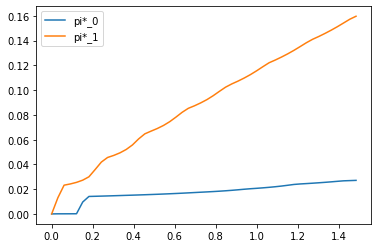

In [33]:
import matplotlib.pyplot as plt

for i, s in enumerate([sols[i] for i in (range(0,len(sols), 3))]):
    plt.plot(x_space[:50], [s.pi_star({'m' : m,}, {})['c'] for m in x_space[:50]], label = f"pi*_{i}")
    
plt.legend()

**TODO**: These are quite unsmooth and it would be good to figure out why.

### Combined plot

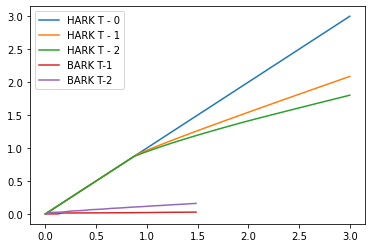

In [34]:
agent = IndShockConsumerType(**init_lifecycle)
agent.solve()

fig = plt.figure()

x = np.linspace(0,3, 100)
N = 3

for t in range(agent.T_age, agent.T_age - N, -1):
    plt.plot(x, agent.solution[t].cFunc(x), label = f"HARK T - {agent.T_age - t}")
    
for i, s in enumerate([sols[i] for i in (range(0,len(sols), 3))]):
    plt.plot(x_space[:50], [s.pi_star({'m' : m,}, {})['c'] for m in x_space[:50]], label = f"BARK T-{i+1}")

plt.legend()
plt.show()

**TODO** These are not even in the same ballpark. It's probably because the constants are off. The discounting may also be off.